                             SistersLab Bitirme Projesi - Başak Dilara Çevik

In [74]:

import patoolib
patoolib.extract_archive("movies_dataset.zip", outdir=".")

patool: Extracting movies_dataset.zip ...
patool: running D:\7-Zip\7z.EXE x -o. -- movies_dataset.zip
patool: ... movies_dataset.zip extracted to `.'.


'.'

In [2]:
import pandas as pd   

import os


folder = r'movies_dataset/'
count = 1
# count increase by 1 in each iteration
# iterate all files from a directory
for file_name in os.listdir(folder):
    try:
    # Construct old file name
        source = folder + file_name

    # Adding the count to the new file name and extension
        destination = folder + "movies_" + str(count) + ".csv"

    # Renaming the file
        os.rename(source, destination)
        count += 1
    except:
        pass
print('Tüm dosyaların isimleri değiştirildi.')

print('Yeni isimler: ')
# verify the result
res = os.listdir(folder)
print(res)
#Veri setlerini okuma
for i in range(1, 9):
    globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), encoding='utf-8', error_bad_lines=False)


df1
    

Tüm dosyaların isimleri değiştirildi.
Yeni isimler: 
['movies_1.csv', 'movies_2.csv', 'movies_3.csv', 'movies_4.csv', 'movies_5.csv', 'movies_6.csv', 'movies_7.csv', 'movies_8.csv']


C:\Users\basak\AppData\Local\Temp\ipykernel_4428\884842904.py:31: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), encoding='utf-8', error_bad_lines=False)
C:\Users\basak\AppData\Local\Temp\ipykernel_4428\884842904.py:31: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), encoding='utf-8', error_bad_lines=False)
C:\Users\basak\AppData\Local\Temp\ipykernel_4428\884842904.py:31: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), encoding='utf-8', error_bad_lines=False)
C:\U

,actorid,name,sex
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
2,28,"'Dead End' Kids, The",M
3,566,"Aaby, Kristian",M
4,580,Aadil,M
...,...,...,...
98685,2749162,"Ôshima, Akiyo",F
98686,2749168,"Ôshima, Yukari",F
98687,2749204,"Ôtani, Ikue",F
98688,2749377,"Örnólfsdóttir, Álfrún",F


In [3]:
#Veri setlerini birleştirme
film_butunu = pd.merge(df2, df3, how='left').merge(df4, how='left').merge(df5, how='left').merge(df6, how='left').merge(df7, how='left').merge(df8, how='left')

oyuncular_butunu = pd.merge(df1, df6, how='left')

oyuncular = oyuncular_butunu.groupby("movieid").agg({'actorid': 'first', "name": "first", "sex": "first"})

oyuncular = oyuncular.rename(columns={ 'actorid': 'oyuncu_kodu', "name": "isim", "sex" : "cinsiyet"})

#Film id'sine göre verileri gruplama
film = film_butunu.groupby('movieid').agg({'title': 'first', 'country': 'first', 'genre': 'first', 'actorid': list, 'language': list,
 'rank': 'first', 'votes' : 'mean', 'year': 'first', 'leading': 'first', 'name': 'first'})


film = film.rename(columns={ 'title': 'baslik', 'country': 'ulke', 'genre': 'tur', 'actorid': 'oyuncu_kodu', 'language': 'dil', 'rank': 'puan', 'votes' : 'oy_sayisi', 'year': 'yil', 'leading': 'basrol', 'name': 'sirket_adi'})



oyuncular.head(10)


#dist yok.

,oyuncu_kodu,isim,cinsiyet
movieid,,,
1672052.0,88796,"Ball, Ray (I)",M
1672111.0,25488,"Alexander, Jace",M
1672580.0,25753,"Alexander, Matt (I)",M
1672716.0,132909,"Berke, Ed",M
1672946.0,238614,"Cantu, David (III)",M
1673647.0,149985,"Bjørnsson, Fredbjørn",M
1673658.0,573391,"Gioia, James",M
1673848.0,201155,"Brown, Nick (IV)",M
1674388.0,125981,"Benfield, John",M


In [4]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au]
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us]
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us]
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us]
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",NaN,NaN,2014,2.0,Grindhouse Films [us]


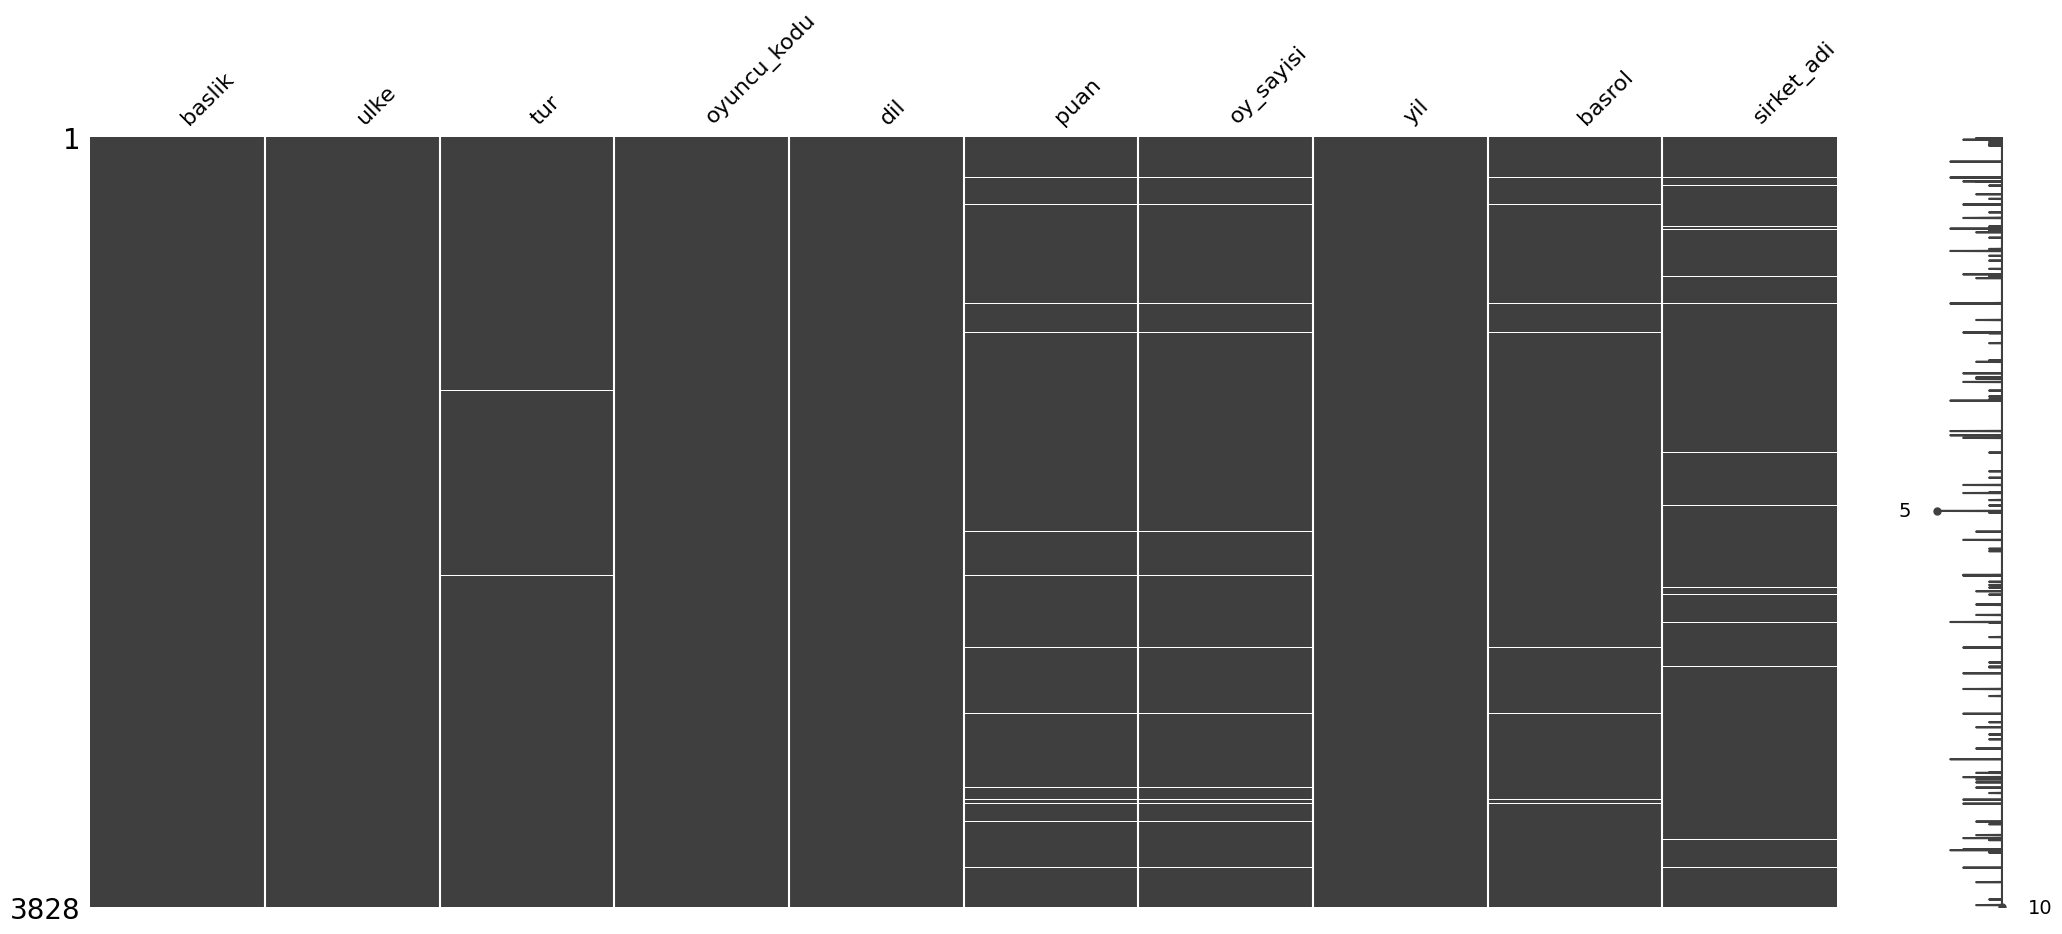

In [5]:
import missingno as msgn

msgn.matrix(film);

In [6]:
film[film["sirket_adi"].isnull()]

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1684910,A Century of Cinema (1994),USA,Documentary,"[37671.0, 69718.0, 75288.0, 133267.0, 216527.0...","[English, English, English, English, English, ...",5.1,239.0,1994,0.0,None
1686071,A Cry in the Dark (2010),Canada,Drama,"[128319.0, 132943.0, 209233.0, 363646.0, 42053...","[English, English, English, English, English, ...",7.4,5.0,2010,3.0,None
1708591,After Life (1999),USA,Drama,"[nan, nan]","[English, English]",NaN,NaN,1999,NaN,None
1725437,An Uninvited Guest (2010),South Korea,Horror,"[nan, nan]","[Korean, Korean]",NaN,NaN,2010,NaN,None
1735791,Arguing the World (1998),USA,Documentary,"[121023.0, 576899.0, 712107.0, 860877.0, 13615...","[English, English, English, English, English]",6.9,65.0,1998,0.0,None
...,...,...,...,...,...,...,...,...,...,...
2492771,The Wild McCullochs (1975),USA,Drama,"[80560.0, 236016.0, 313319.0, 345012.0, 389000...","[English, English, English, English, English, ...",4.8,59.0,1975,3.0,None
2503124,Time Code (2005),Italy,Drama,"[nan, nan]","[Italian, Italian]",NaN,NaN,2005,NaN,None
2504995,To Be or Not to Be (1942),USA,Comedy,"[70042.0, 128275.0, 189335.0, 430969.0, 637819...","[English, English, English, English, English, ...",8.1,13350.0,1942,5.0,None


In [7]:
oyuncular.head()

,oyuncu_kodu,isim,cinsiyet
movieid,,,
1672052.0,88796,"Ball, Ray (I)",M
1672111.0,25488,"Alexander, Jace",M
1672580.0,25753,"Alexander, Matt (I)",M
1672716.0,132909,"Berke, Ed",M
1672946.0,238614,"Cantu, David (III)",M


In [8]:
def eksik_verilerim(df):
    eksik_veriler = df.isnull().sum()
    eksik_veriler_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_veriler_tablo = pd.concat([eksik_veriler, eksik_veriler_yuzde], axis=1)
    eksik_veriler_tablo_sonuc = eksik_veriler_tablo.rename(
    columns = {0 : 'Eksik Verilerin Sayısı', 1 : '% Değeri'})
    return eksik_veriler_tablo_sonuc

eksik_verilerim(film)   

,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.000000
ulke,0,0.000000
tur,15,0.391850
oyuncu_kodu,0,0.000000
dil,0,0.000000
puan,55,1.436782
oy_sayisi,57,1.489028
yil,0,0.000000
basrol,31,0.809822
sirket_adi,64,1.671891


In [9]:

film = film.fillna("0")


eksik_verilerim(film)


,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.0
ulke,0,0.0
tur,0,0.0
oyuncu_kodu,0,0.0
dil,0,0.0
puan,0,0.0
oy_sayisi,0,0.0
yil,0,0.0
basrol,0,0.0
sirket_adi,0,0.0


In [10]:
oyuncular = oyuncular.dropna()
eksik_verilerim(oyuncular)

,Eksik Verilerin Sayısı,% Değeri
oyuncu_kodu,0,0.0
isim,0,0.0
cinsiyet,0,0.0


In [11]:
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828 entries, 1672052 to 2593313
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   baslik       3828 non-null   object
 1   ulke         3828 non-null   object
 2   tur          3828 non-null   object
 3   oyuncu_kodu  3828 non-null   object
 4   dil          3828 non-null   object
 5   puan         3828 non-null   object
 6   oy_sayisi    3828 non-null   object
 7   yil          3828 non-null   int64 
 8   basrol       3828 non-null   object
 9   sirket_adi   3828 non-null   object
dtypes: int64(1), object(9)
memory usage: 329.0+ KB


In [12]:
oyuncular.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3798 entries, 1672052.0 to 2593313.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   oyuncu_kodu  3798 non-null   int64 
 1   isim         3798 non-null   object
 2   cinsiyet     3798 non-null   object
dtypes: int64(1), object(2)
memory usage: 118.7+ KB


In [13]:
film.shape

(3828, 10)

In [14]:
oyuncular.shape

(3798, 3)

In [15]:
#Sütunların dağılımı
film.describe().T


,count,mean,std,min,25%,50%,75%,max
yil,3828.0,1985.36442,18.176059,1898.0,1981.0,1994.0,1997.0,2014.0


In [16]:
oyuncular.describe().T

,count,mean,std,min,25%,50%,75%,max
oyuncu_kodu,3798.0,127591.18931,207430.01525,4.0,30503.0,70215.5,148618.0,2579564.0


**Ülkelere göre film sayısı**

In [17]:
film.groupby('ulke').size().sort_values(ascending=False)


ulke
USA                               2500
UK                                 368
France                             275
Canada                             125
Germany                            104
Australia                           67
Italy                               59
Japan                               53
Ireland                             30
Belgium                             29
Hong Kong                           22
China                               18
Spain                               17
Argentina                           13
Austria                             12
New Zealand                         12
Mexico                              12
Denmark                             11
India                               10
Brazil                               7
South Africa                         5
Norway                               5
Soviet Union                         5
Czech Republic                       5
Cuba                                 5
Netherlands         

**Yıllara göre film sayısı ve görselleştirilmesi**

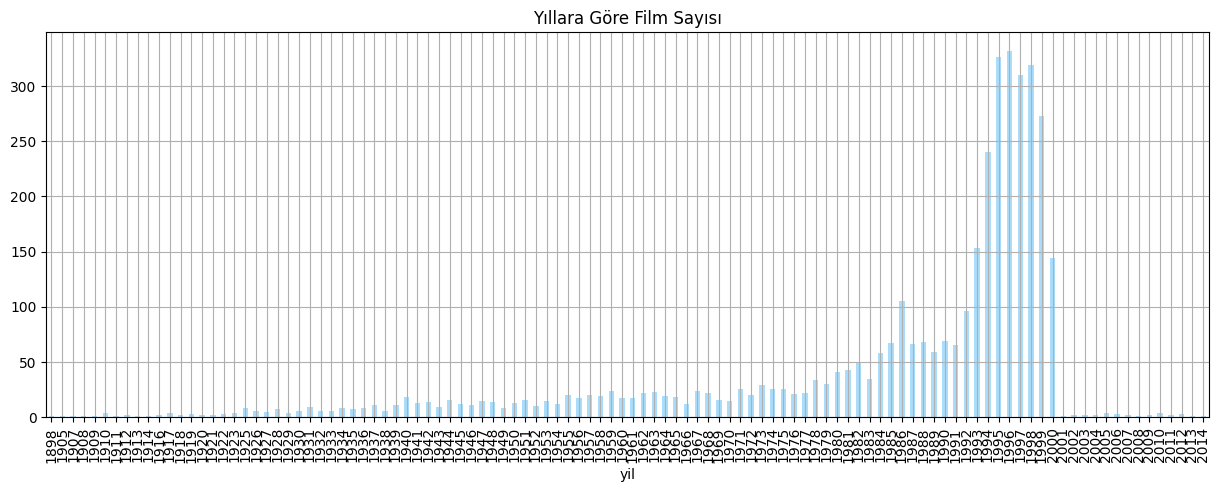

In [18]:
film.groupby('yil').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Yıllara Göre Film Sayısı', alpha=0.7,
grid=True);


**Ülkelere göre film sayısı**

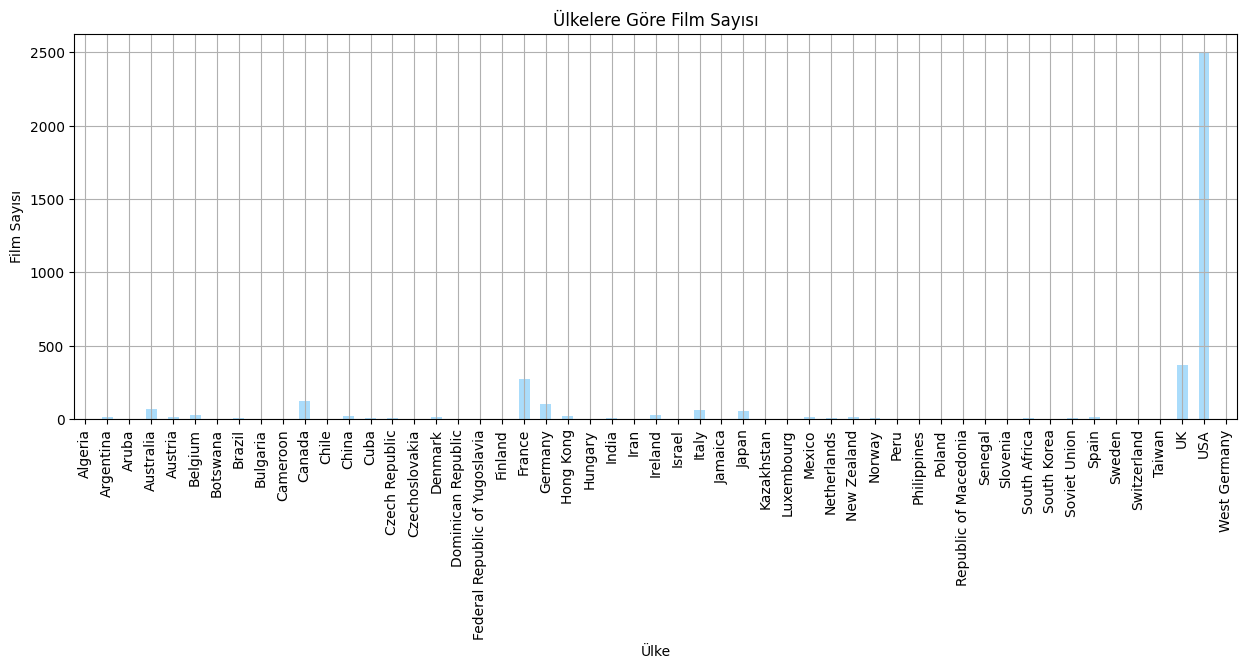

In [19]:
film.groupby('ulke').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Ülkelere Göre Film Sayısı', alpha=0.7, xlabel='Ülke',
 ylabel='Film Sayısı', grid=True);


* Kolayca gruplara ayırabilmek için fonksiyon tanımlayalım

In [20]:
def gruplama(df, kolon):
    return df.groupby(kolon).size().sort_values(ascending=False)

gruplama(film, 'ulke')

ulke
USA                               2500
UK                                 368
France                             275
Canada                             125
Germany                            104
Australia                           67
Italy                               59
Japan                               53
Ireland                             30
Belgium                             29
Hong Kong                           22
China                               18
Spain                               17
Argentina                           13
Austria                             12
New Zealand                         12
Mexico                              12
Denmark                             11
India                               10
Brazil                               7
South Africa                         5
Norway                               5
Soviet Union                         5
Czech Republic                       5
Cuba                                 5
Netherlands         

* Scatter çizmek için fonksiyon tanımlayalım.

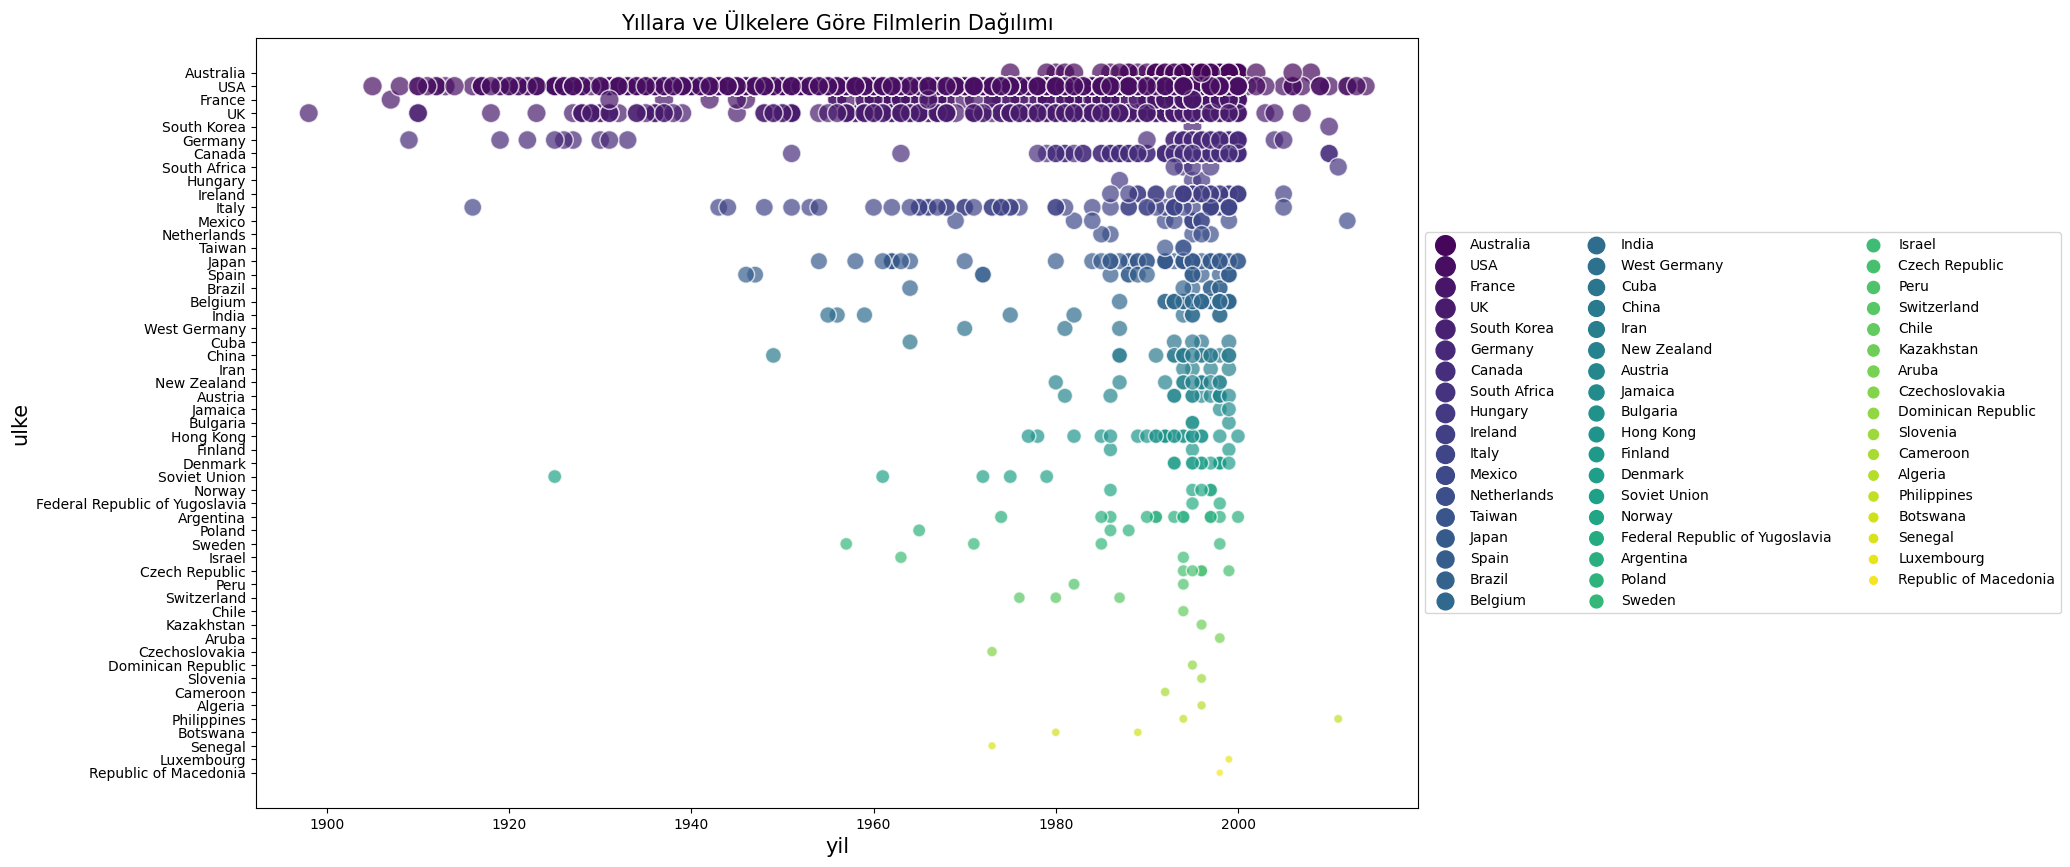

In [21]:
#yıllara ve ülkeye göre scatter plot



def scatter_ciz(x, y, data, hue, size, sizes, alpha, palette, title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,10))
    g = sns.scatterplot(x=x, y=y, data=data, hue=hue, size=size, sizes=sizes, alpha=alpha, palette=palette)
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
    g.set_xlabel(x, fontsize=15)
    g.set_ylabel(y, fontsize=15)
    plt.title(title, fontsize=15)
    plt.show()

scatter_ciz('yil', 'ulke', film, 'ulke', 'ulke', (30, 200), 0.7, 'viridis', 'Yıllara ve Ülkelere Göre Filmlerin Dağılımı')




In [22]:
%matplotlib inline

*  Pie-chart için bir fonksiyon tanımlayalım.

In [23]:
import matplotlib.pyplot as plt
def ilk_10_ciz(x, y, title):
    
    colors = ['yellowgreen','red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, shadow = True, startangle=90, radius=1.2, rotatelabels = True, textprops=dict(color="black"), 
    wedgeprops = { 'linewidth' :0.9, 'edgecolor' : 'white' }, labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)])

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

    plt.axis('equal')
    plt.text(0, 0, title, fontsize=20, color='black', ha='center', va='center')




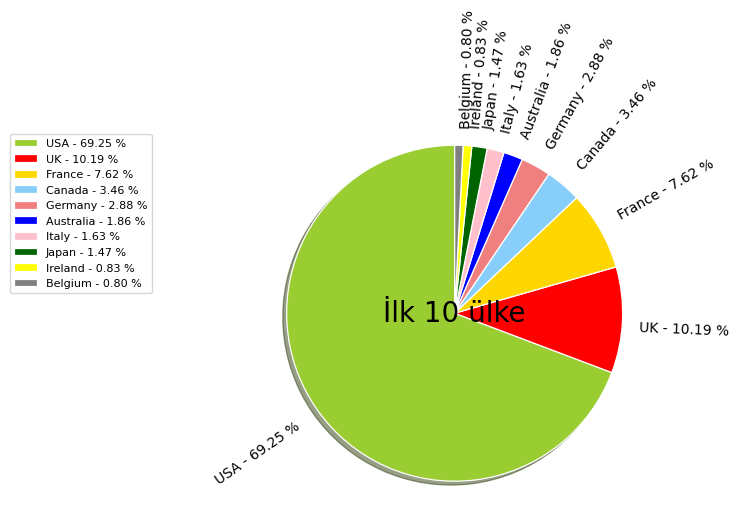

In [24]:
film_ulke = film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
x = film_ulke.sort_values(ascending=False).head(10).index
y = film_ulke.sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'İlk 10 ülke')
plt.savefig('filmlerin_ulkelere_gore_dagilimi.png', bbox_inches='tight', dpi=600)

                                                    
                                                Aktörlerin oynadığı film sayısı

In [25]:


def sayisini_bul(df, kolon):
    return df.groupby(kolon).size().sort_values(ascending=False).head(20)

oyuncu_film_sayisi = sayisini_bul(oyuncular, 'isim')
oyuncu_film_sayisi


isim
Affleck, Ben                13
Aiello, Danny               12
Ackland, Joss               11
Abraham, F. Murray          11
Bacon, Kevin (I)            10
Abercrombie, Ian             9
Astaire, Fred                9
Alexander, Jason (I)         9
Aykroyd, Dan                 9
Angel, Jack (I)              9
Ashton-Griffiths, Roger      9
Allen, Woody                 8
Bacarella, Mike              8
Adair-Rios, Mark             7
Ameche, Don                  7
Auteuil, Daniel              7
Abrahams, Jon (I)            7
Acheson, Mark                7
Adamson, Christopher (I)     7
Akin, Philip                 6
dtype: int64

* En çok filmde oynayan ilk 10 oyuncuyu çizmek için:

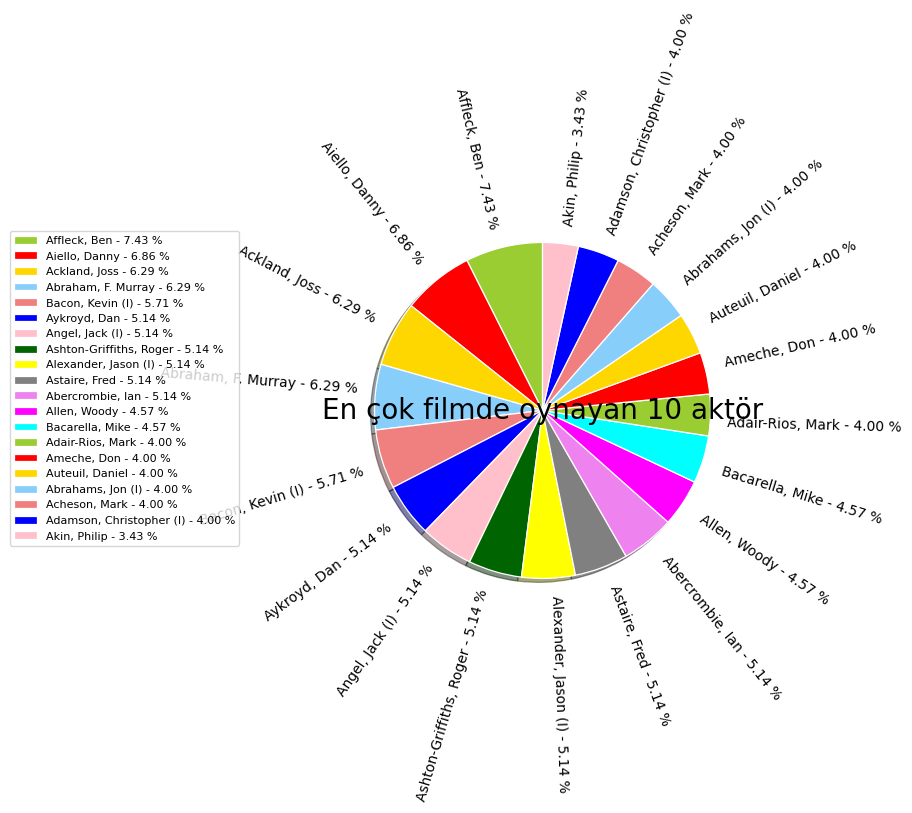

In [26]:
x = oyuncu_film_sayisi.sort_values(ascending=False).head(20).index
y = oyuncu_film_sayisi.sort_values(ascending=False).head(20).values
ilk_10_ciz(x, y, 'En çok filmde oynayan 10 aktör')
plt.savefig('en_cok_filmde_oynayan.png', bbox_inches='tight', dpi=600)

**Puan ve Oylama Miktarlarına Göre Filmlerin İncelenmesi**

In [78]:
moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')
              
puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())
moviemat.head()
  
puanlama.sort_values('puan', ascending = False).head(10)

moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')

puanlama.sort_values('oy_sayisi', ascending = False).head(10)

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
...,...,...,...
Star Wars (1977),8.8,547422.0,Action
American Beauty (1999),8.5,520963.0,Drama


<AxesSubplot: >

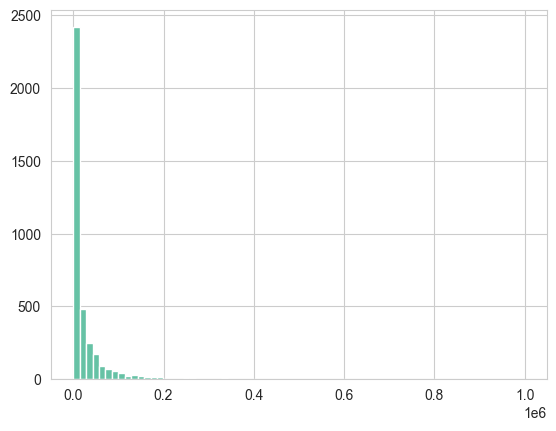

In [79]:
#Kategorik hale getirme

#Dağılımları inceleyelim
puanlama['oy_sayisi'].hist(bins=70)

<AxesSubplot: >

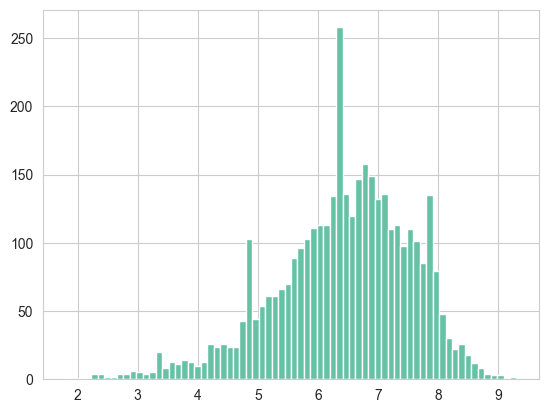

In [80]:
puanlama['puan'].hist(bins=70)

In [109]:
#Puanlama ve oy sayılarını kategorik hale getirelim

puanlama_aralik = puanlama['oy_sayisi'].quantile(np.arange(0, 1, .01))

puanlama_aralik = puanlama_aralik.astype(int)

puanlama_aralik

#puanlama_aralik halini kategorik hale getirelim


0.00    0
0.01    1
       ..
0.98    1
0.99    1
Name: oy_sayisi, Length: 100, dtype: int32

**Aktörlerin oynadığı film türleri**

In [77]:
#noktalı catplot ile ülkelere göre film sayıları
#puan ve oylamayayı kategorik hale getirip görselleştirme yapılabilir.
#yorumlama yap
#read.me dosyası oluştur

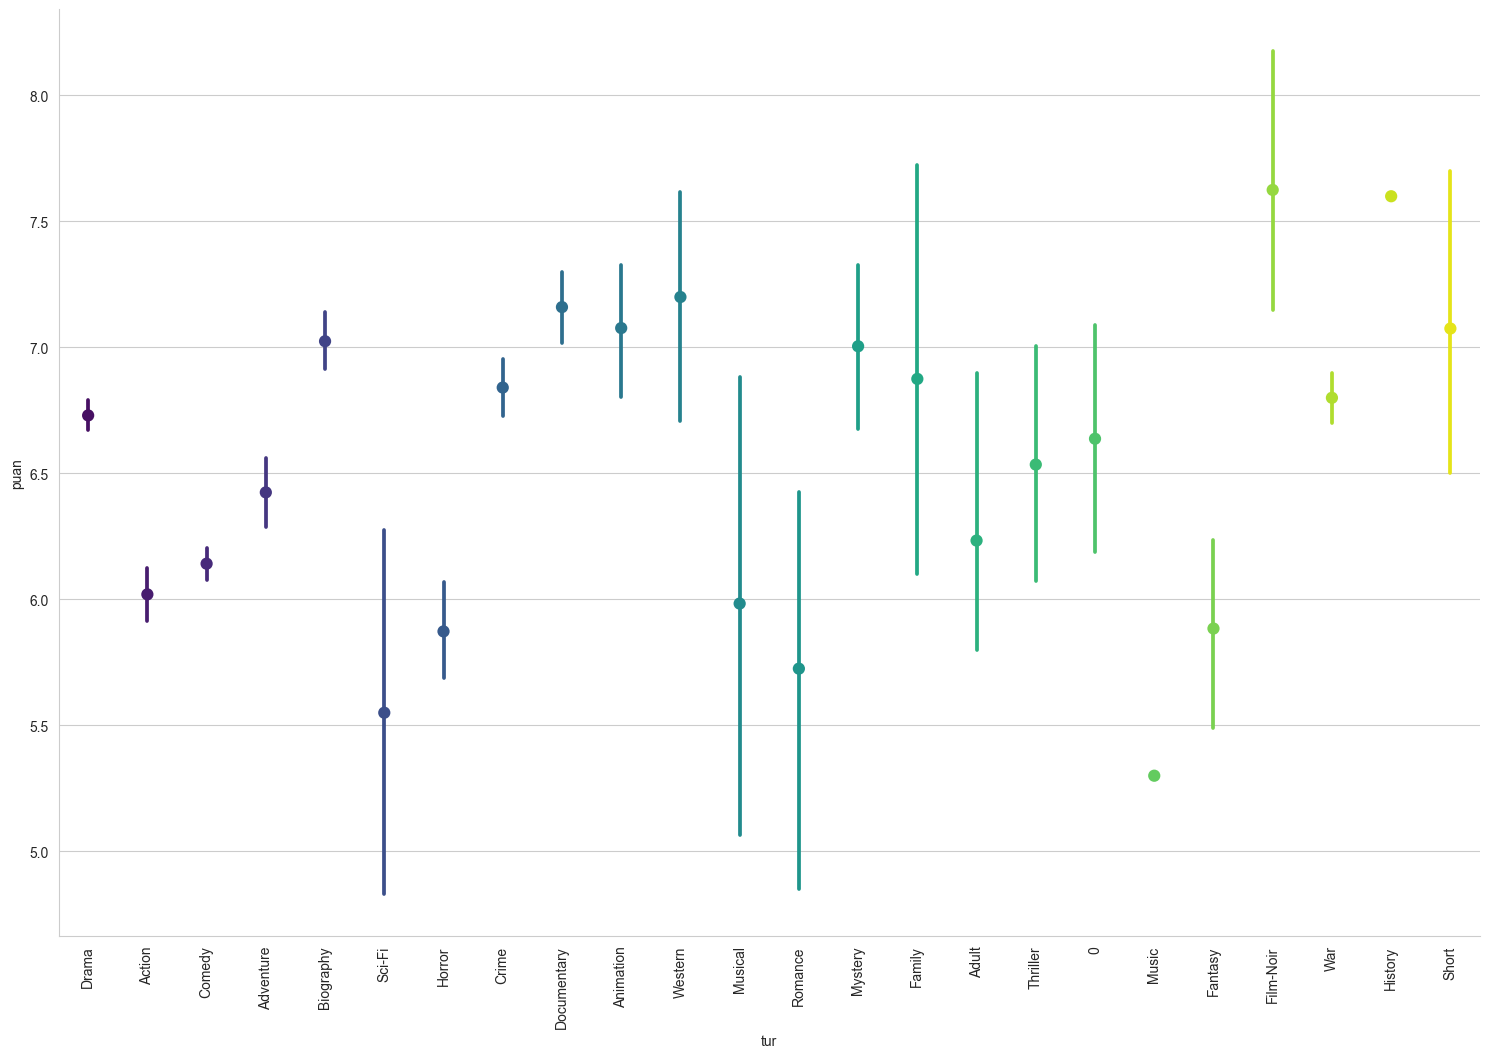

In [129]:
sns.catplot(x = 'tur', y = 'puan', data = puanlama, kind = 'point', height = 10, aspect = 1.5, palette = 'viridis')
plt.xticks(rotation = 90);

In [28]:
#Tür, isim, oyuncu kodu ve film kodu sütunlarından oluşan bir veri seti oluşturuldu.


oyuncular_kod = oyuncular[['isim', 'oyuncu_kodu']] 
turler = film[['tur']]
oyuncu_tur = pd.concat([oyuncular_kod, turler], axis=1)

oyuncu_tur.dropna(inplace=True)
oyuncu_tur

turlere_gore_oyuncular = oyuncu_tur.groupby("tur")["isim"].value_counts()

with open('turlere_gore_oyuncular.txt', 'w', encoding="utf-8") as f:
    f.write(turlere_gore_oyuncular.to_string())



#film_oyuncu_baglantisi = film_oyuncular.append(oyuncular, ignore_index=True,)
#film_oyuncu_baglantisi

In [29]:
oyuncuların_film_turune_gore_siralanması = oyuncu_tur.groupby("isim")["tur"].value_counts().sort_values(ascending=False).reset_index(name="count")


with open('oyuncuların_film_turune_gore_siralanması.txt', 'w', encoding='utf-8') as f:
    f.write(oyuncuların_film_turune_gore_siralanması.to_string())

In [30]:
#En çok hangi tür filmlerde oynayan oyuncular var?

oyuncuların_film_turune_gore_siralanması.groupby("isim").head(1).sort_values(by="count", ascending=False).head(10)

,isim,tur,count
0,"Affleck, Ben",Comedy,8
2,"Astaire, Fred",Comedy,6
1,"Aiello, Danny",Comedy,6
3,"Ameche, Don",Comedy,5
4,"Alexander, Jason (I)",Comedy,5
5,"Abercrombie, Ian",Comedy,5
6,"Adamson, Christopher (I)",Action,5
7,"Angel, Jack (I)",Adventure,5
8,"Allen, Woody",Comedy,5
16,"Abraham, F. Murray",Action,4


In [31]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au]
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us]
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us]
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us]
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",0,0,2014,2.0,Grindhouse Films [us]


**Ülkelere göre hangi tür filmler çekilmiş?** 

In [32]:
#oyuncu ve film tablolarının birleştirilmesi. Mantıklı olmuyor çünkü filmlerin cinsiyet verisi yok. O yüzden bu tabloyu kullanmayacağız. 
oyuncu_film = pd.concat([film, oyuncular], axis=1)
oyuncu_film.head()




,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,oyuncu_kodu,isim,cinsiyet
movieid,,,,,,,,,,,,,
1672052.0,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980.0,20.0,7 Network [au],88796.0,"Ball, Ray (I)",M
1672111.0,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988.0,39.0,Paramount Pictures [us],25488.0,"Alexander, Jace",M
1672580.0,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997.0,22.0,Lakeshore Entertainment [us],25753.0,"Alexander, Matt (I)",M
1672716.0,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986.0,3.0,Aaron Spelling Productions [us],132909.0,"Berke, Ed",M
1672946.0,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",0,0,2014.0,2.0,Grindhouse Films [us],238614.0,"Cantu, David (III)",M


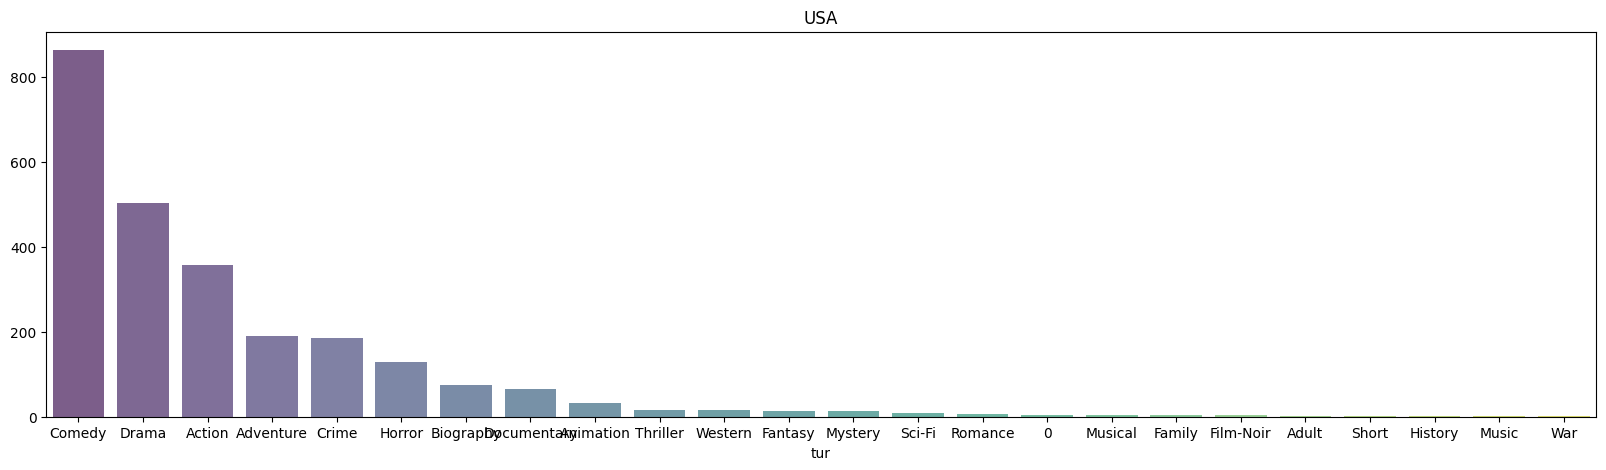

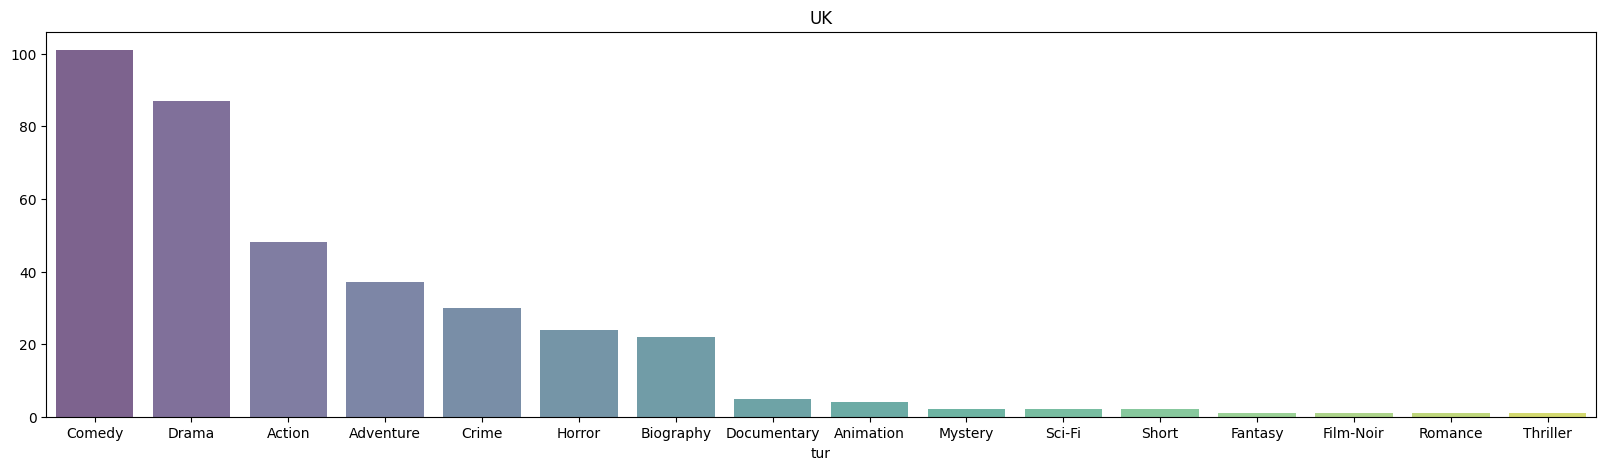

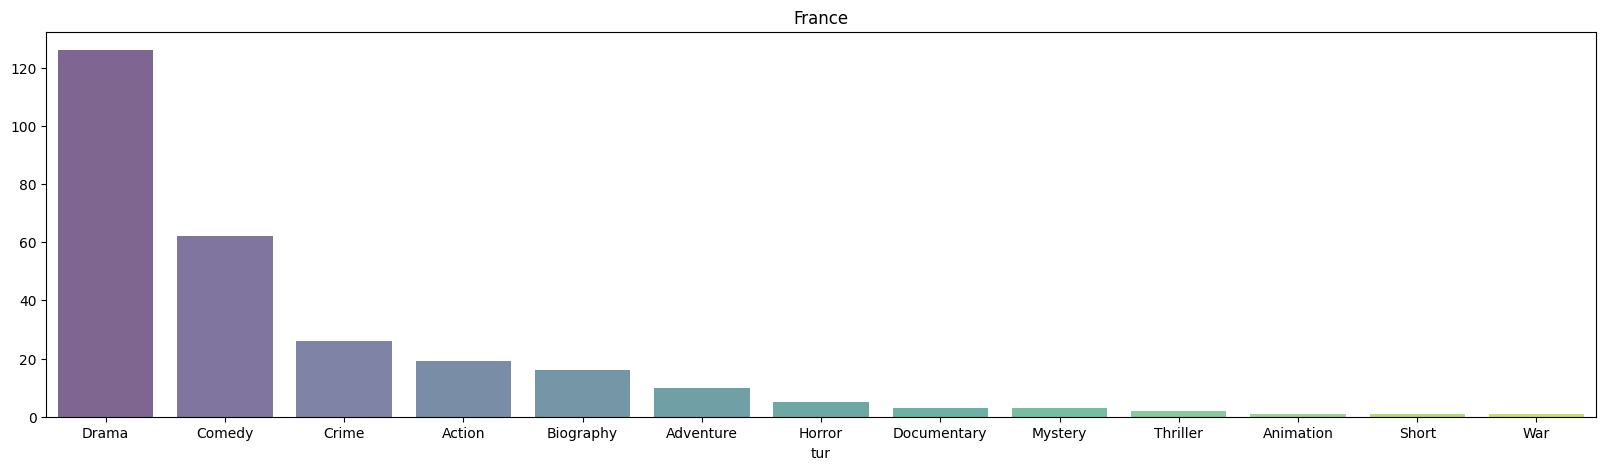

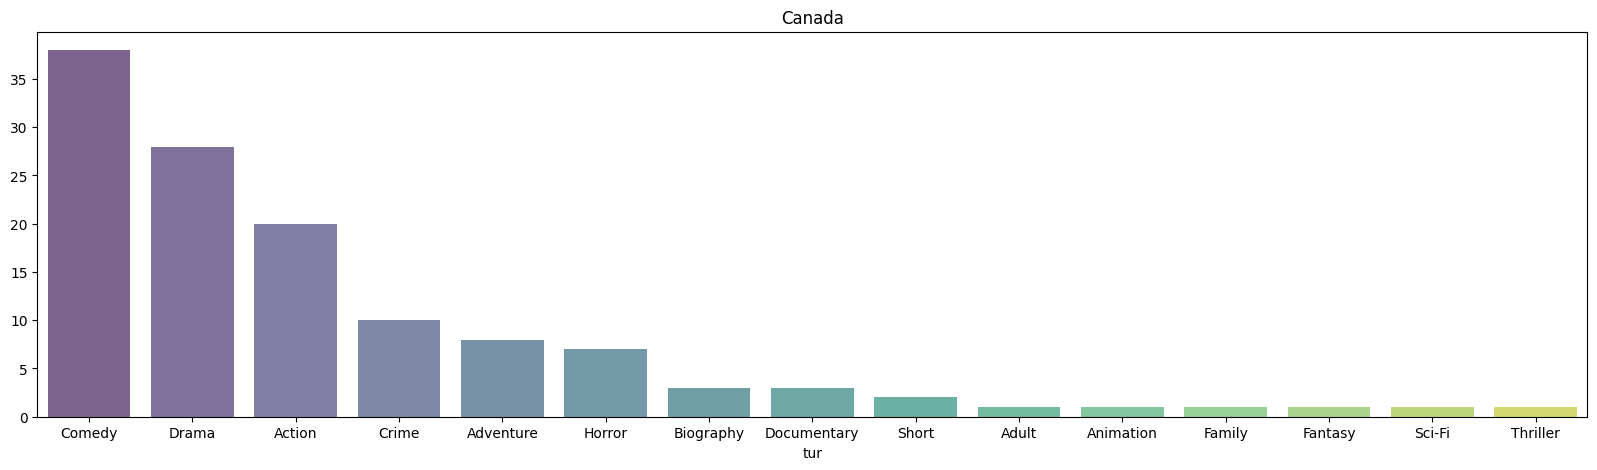

In [33]:

ulke_tur = pd.concat([film['tur'],film['ulke']], axis=1)

ulke_tur.head(10)
ulke_tur = ulke_tur.groupby("ulke")["tur"].value_counts()
ulke_tur



#en çok filmi olan 10 ülke
film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
#USA, UK, Fransa, Kanada ve Türkiye için inceleyelim.
usa = ulke_tur.loc['USA']
uk = ulke_tur.loc['UK']
fr = ulke_tur.loc['France']
can = ulke_tur.loc['Canada']


#Grafik çizimi için fonksiyon tanımlayalım.
def ciz(country, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(20,5))
    sns.barplot(x=country.index, y=country.values, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.show()

ciz(usa, 'USA')
ciz(uk, 'UK')
ciz(fr, 'France')
ciz(can, 'Canada')

    



**Türe göre kadın-erkek aktör sayısı**

In [34]:
cinsiyet = sayisini_bul(oyuncular, 'cinsiyet')
cinsiyet

cinsiyet
M    3782
F      16
dtype: int64

In [35]:
#Türe göre kadın erkek sayısını bulalım.

ture_gore_cinsiyet_sayisi = pd.concat([film['tur'], oyuncular['cinsiyet']], axis=1).groupby("tur")["cinsiyet"].value_counts()


In [36]:
#En çok filme göre bakalım.
tur_cinsiyet = pd.concat([film['tur'], oyuncular['cinsiyet']], axis=1).groupby("tur")["cinsiyet"].value_counts().sort_values(ascending=False).reset_index(name="count")
tur_cinsiyet

,tur,cinsiyet,count
0,Comedy,M,1185
1,Drama,M,911
2,Action,M,539
3,Crime,M,278
4,Adventure,M,275
5,Horror,M,190
6,Biography,M,144
7,Documentary,M,75
8,Animation,M,41
9,Mystery,M,22


In [37]:
ture_gore_cinsiyet_sayisi

tur          cinsiyet
0            M             12
             F              1
Action       M            539
Adult        M              3
Adventure    M            275
Animation    M             41
             F              1
Biography    M            144
             F              3
Comedy       M           1185
             F              2
Crime        M            278
             F              1
Documentary  M             75
             F              4
Drama        M            911
             F              2
Family       M              4
Fantasy      M             19
Film-Noir    M              4
History      M              1
Horror       M            190
             F              1
Music        M              1
Musical      M              6
Mystery      M             22
Romance      M              9
Sci-Fi       M             16
Short        M              8
Thriller     M             20
War          M              2
Western      M             17
Name: cinsiyet, dt

In [76]:
#Bazı türlerde kadınlar hiç oynamamış. Bu yüzden az oynan türleri çıkartalım.
#Çıkarttıktan sonra plotunu çizelim. 
import seaborn as sns

turler = tur_cinsiyet['tur'].unique()

for tur in turler:
    if tur_cinsiyet[tur_cinsiyet['tur'] == tur]['cinsiyet'].count() < 2:
        tur_cinsiyet = tur_cinsiyet[tur_cinsiyet['tur'] != tur]
        
tur_cinsiyet

#Cinsiyeti sayısallaştıralım.



,tur,cinsiyet,count
0,Comedy,M,1185
1,Drama,M,911
...,...,...,...
28,Animation,F,1
30,Crime,F,1


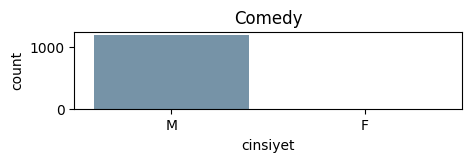

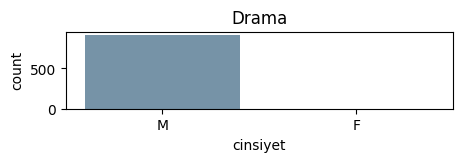

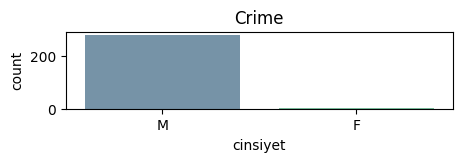

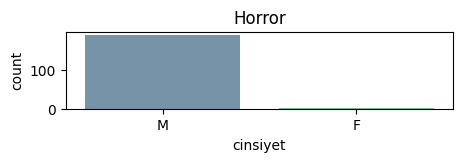

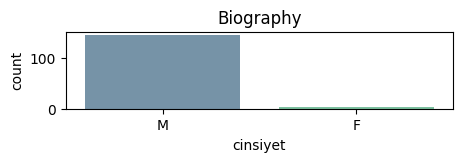

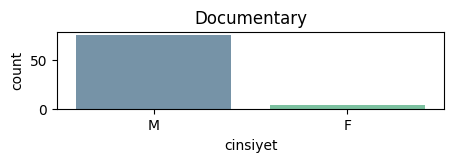

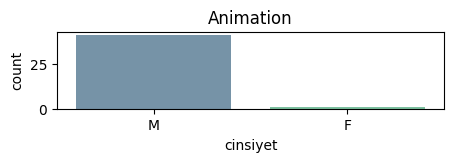

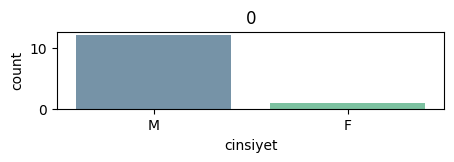

In [ ]:

#Türlerin cinsiyet dağılımını görselleştirelim.
for i in tur_cinsiyet['tur'].unique():
    plt.figure(figsize=(5,1))
    sns.barplot(x=tur_cinsiyet[tur_cinsiyet['tur'] == i]['cinsiyet'], y=tur_cinsiyet[tur_cinsiyet['tur'] == i]['count'], palette='viridis', alpha=0.7)
    plt.title(i)
    plt.show()

* Histogramların incelenmesi için fonksiyon oluşturma



In [73]:
def histogram_olustur(df, kolon, title):
    import seaborn as sns
    plt.figure(figsize =(10, 4))
    sns.set_style("whitegrid")
    sns.set_palette("Set2")
    df[kolon].hist(bins = 70)
    plt.title(title, fontsize=15)

In [74]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au],Breaker Morant 1980
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us],Crocodile Dundee II 1988
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us],Til There Was You 1997
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us],night Mother 1986
1673647,1-2-3-4 ou Les collants noirs (1961),France,Drama,"[149985.0, 149985.0, 149985.0, 261595.0, 26159...","[French, French, French, French, French, Frenc...",6.5,128.0,1961,0.0,Doperfilme [pt],1 2 3 4 ou Les collants noirs 1961


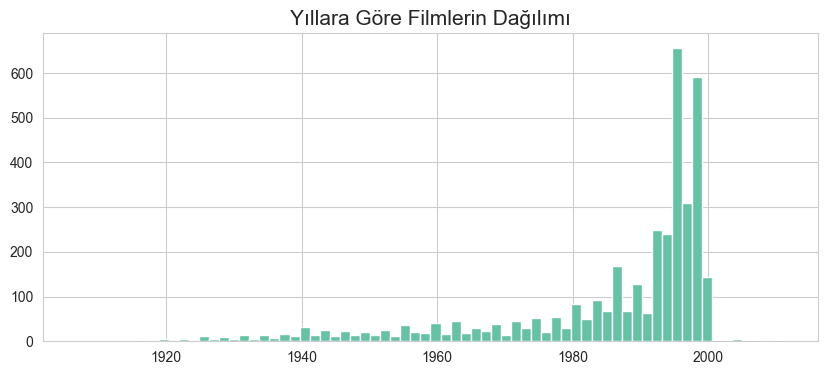

In [75]:
histogram_olustur(film, 'yil', 'Yıllara Göre Filmlerin Dağılımı')

<bound method Series.unique of movieid
1672052    7.8
1672111    5.3
1672580    4.4
1672716    7.0
1672946      0
          ... 
2591814    6.8
2592334    6.2
2592963    7.6
2593112    6.9
2593313    6.9
Name: puan, Length: 3828, dtype: object>

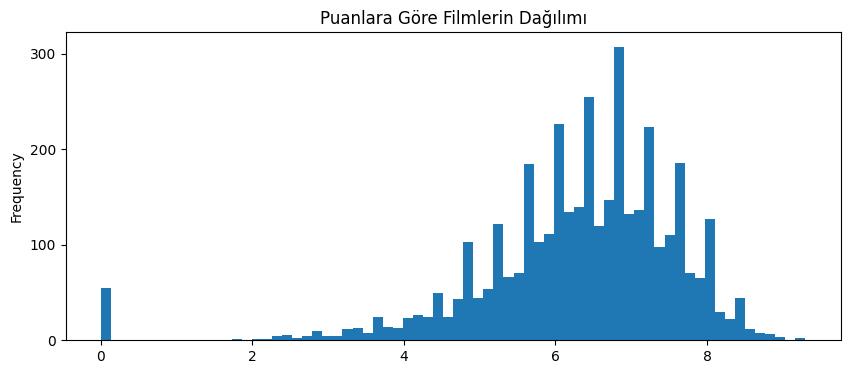

In [45]:
film["puan"].astype("float").plot(kind = 'hist', bins = 70, figsize = (10,4), title='Puanlara Göre Filmlerin Dağılımı', yticks=range(0, 400, 100))
film["puan"].unique

<AxesSubplot: title={'center': 'Puanlara Göre Filmlerin Dağılımı'}, ylabel='Frequency'>

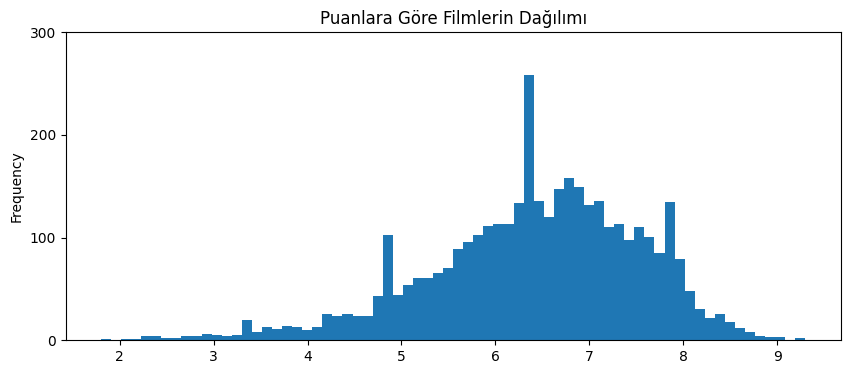

In [46]:
#0 grubu outlier olarak düşünülebilir. 0 olanları çıkartalım. Bu sıfırları daha önce doldurmuştum.
film = film[film['puan'] != str(0)]
film["puan"].astype("float").plot(kind = 'hist', bins = 70, figsize = (10,4), title='Puanlara Göre Filmlerin Dağılımı', yticks=range(0, 400, 100))

In [47]:
#

                           Seçilen filme göre film öneri sistemi

In [48]:
moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')
              
puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())
moviemat.head()
  
puanlama.sort_values('puan', ascending = False).head(10)

moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')

puanlama.sort_values('oy_sayisi', ascending = False).head(10)
           

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
Fight Club (1999),8.9,759494.0,Drama
The Matrix (1999),8.7,719107.0,Action
The Godfather (1972),9.2,706695.0,Crime
Forrest Gump (1994),8.7,659495.0,Drama
Se7en (1995),8.7,581528.0,Crime
Gladiator (2000),8.5,558053.0,Action
Star Wars (1977),8.8,547422.0,Action


In [49]:
for i in puanlama.index:
    if i not in moviemat.columns:
        moviemat[i] = np.nan

moviemat.head()



baslik,'Breaker' Morant (1980),'Crocodile' Dundee II (1988),'Til There Was You (1997),"'night, Mother (1986)",1-2-3-4 ou Les collants noirs (1961),1-900 (1996),10 Things I Hate About You (1999),101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),...,Zbogum na dvaesetiot vek (1998),Zerkalo (1975),Zero Effect (1998),Zeus and Roxanne (1997),Zone 39 (1996),eXistenZ (1999),¡Three Amigos! (1986),À nous la liberté (1931),Á köldum klaka (1995),Átame! (1990)
movieid,,,,,,,,,,,,,,,,,,,,,
1672052,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672111,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672580,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672716,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1673647,NaN,NaN,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
moviemat = moviemat.fillna(int(0))


In [51]:
moviemat.head()

baslik,'Breaker' Morant (1980),'Crocodile' Dundee II (1988),'Til There Was You (1997),"'night, Mother (1986)",1-2-3-4 ou Les collants noirs (1961),1-900 (1996),10 Things I Hate About You (1999),101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),...,Zbogum na dvaesetiot vek (1998),Zerkalo (1975),Zero Effect (1998),Zeus and Roxanne (1997),Zone 39 (1996),eXistenZ (1999),¡Three Amigos! (1986),À nous la liberté (1931),Á köldum klaka (1995),Átame! (1990)
movieid,,,,,,,,,,,,,,,,,,,,,
1672052,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672111,0.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672580,0.0,0.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672716,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673647,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
puanlama.drop_duplicates(inplace=True)
puanlama.head()

,puan,oy_sayisi,tur
baslik,,,
'Breaker' Morant (1980),7.8,8111.0,Drama
'Crocodile' Dundee II (1988),5.3,32183.0,Action
'Til There Was You (1997),4.4,1894.0,Comedy
"'night, Mother (1986)",7.0,1255.0,Drama
1-2-3-4 ou Les collants noirs (1961),6.5,128.0,Drama


In [53]:
puanlama.sort_values('oy_sayisi', ascending = False).head(10)

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
Fight Club (1999),8.9,759494.0,Drama
The Matrix (1999),8.7,719107.0,Action
The Godfather (1972),9.2,706695.0,Crime
Forrest Gump (1994),8.7,659495.0,Drama
Se7en (1995),8.7,581528.0,Crime
Gladiator (2000),8.5,558053.0,Action
Star Wars (1977),8.8,547422.0,Action


In [54]:
shawshank = moviemat['The Shawshank Redemption (1994)']
starwars = moviemat['Star Wars (1977)']

starwars.head()

movieid
1672052    0.0
1672111    0.0
1672580    0.0
1672716    0.0
1673647    0.0
Name: Star Wars (1977), dtype: float64

In [55]:
#Filmlerin birbirleriyle olan benzerliklerini hesaplayalım.
#Pearson benzerlik katsayısı kullanacağız.
#Bu katsayı 1'e yaklaştıkça benzerlik artar.
#0'a yaklaştıkça benzerlik azalır.
#-1'e yaklaştıkça benzerlik ters yönde artar.

#Pearson benzerlik katsayısı

def benzerlik_pearson(r1, r2):
    from scipy.stats import pearsonr
    r1_c = r1 - r1.mean()
    r2_c = r2 - r2.mean()
    return pearsonr(r1_c, r2_c)[0]


benzerlik = benzerlik_pearson(shawshank, starwars)
benzerlik

-0.0002651113467656425

In [57]:
import re
#Sadece bu karakterleri kullanan isimler lazım.
def temizleme(baslik):
    return re.sub("[^a-zA-Z0-9 ]", " ", baslik)


In [64]:
film['temiz_baslik'] = film['baslik'].apply(temizleme)

In [65]:
#Başlıkları vektörler halinde tutalım.
from sklearn.feature_extraction.text import TfidfVectorizer
 
vektor = TfidfVectorizer(ngram_range=(1, 2))
tfidf = vektor.fit_transform(film['temiz_baslik'])

In [66]:
film

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au],Breaker Morant 1980
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us],Crocodile Dundee II 1988
...,...,...,...,...,...,...,...,...,...,...,...
2593112,Á köldum klaka (1995),Denmark,Comedy,"[60288.0, 60288.0, 60288.0, 60288.0, 60288.0, ...","[English, English, English, English, English, ...",6.9,1231.0,1995,25.0,Altar Productions - (co-production),k ldum klaka 1995
2593313,Átame! (1990),Spain,Comedy,"[32498.0, 91416.0, 91423.0, 330811.0, 387030.0...","[Spanish, Spanish, Spanish, Spanish, Spanish, ...",6.9,12087.0,1990,26.0,El Deseo S.A. [es],tame 1990


In [67]:
pd.set_option('display.max_rows', 5)
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

film_temizlenmis = film.drop(['oyuncu_kodu', 'dil'], axis = 1)
film.drop_duplicates(subset='baslik', inplace=True)

def arama(baslik):
    baslik = temizleme(baslik)
    sorgu_vektoru = vektor.transform([baslik])
    benzerlik = cosine_similarity(tfidf, sorgu_vektoru).flatten()
    #en_benzer = np.argsort(-benzerlik)[:10]
    #return film.iloc[en_benzer]
    indis = np.argpartition(benzerlik, -5)[-5:]
    sonuc = film_temizlenmis.iloc[indis][::-1]
    return sonuc

arama('Star Wars')

,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,
2371726,Star Wars (1977),USA,Action,8.8,547422.0,1977,0.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars 1977
2371778,Star Wars: Episode I - The Phantom Menace (1999),USA,Action,6.5,332748.0,1999,11.0,Lucasfilm [us],Star Wars Episode I The Phantom Menace 1999
2371786,Star Wars: Episode V - The Empire Strikes Back...,USA,Action,8.8,487093.0,1980,8.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars Episode V The Empire Strikes Back...
2371787,Star Wars: Episode VI - Return of the Jedi (1983),USA,Action,8.4,382574.0,1983,37.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars Episode VI Return of the Jedi 1983
2216295,North Star (1996),France,Action,4.6,695.0,1996,10.0,AFCL Productions,North Star 1996


In [70]:
arama('The Shawshank Redemption')


,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,
2477653,The Shawshank Redemption (1994),USA,Crime,9.3,998823.0,1994,47.0,Castle Rock Entertainment [us] - (presents),The Shawshank Redemption 1994
2479393,The Slipper and the Rose: The Story of Cindere...,UK,Adventure,6.5,1319.0,1976,39.0,Paradine Co-Productions - (presents) (as Parad...,The Slipper and the Rose The Story of Cindere...
2419930,The City of the Dead (1960),UK,Horror,6.8,2529.0,1960,13.0,Vulcan,The City of the Dead 1960
2429271,The End of the Affair (1999),UK,Drama,7.0,13547.0,1999,5.0,Columbia Pictures Corporation [us],The End of the Affair 1999
2486655,The Transformers: The Movie (1986),Japan,Action,7.1,26140.0,1986,1.0,Hasbro [us],The Transformers The Movie 1986


In [71]:
arama('The Godfather')

,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,
2437300,The Godfather: Part III (1990),USA,Crime,7.6,167195.0,1990,42.0,Paramount Pictures [us],The Godfather Part III 1990
2437299,The Godfather: Part II (1974),USA,Crime,9.0,457100.0,1974,36.0,Paramount Pictures [us] - (as A Paramount Pict...,The Godfather Part II 1974
2437277,The Godfather (1972),USA,Crime,9.2,706695.0,1972,15.0,Alfran Productions [us] - (produced by) (as Al...,The Godfather 1972
2419930,The City of the Dead (1960),UK,Horror,6.8,2529.0,1960,13.0,Vulcan,The City of the Dead 1960
2479393,The Slipper and the Rose: The Story of Cindere...,UK,Adventure,6.5,1319.0,1976,39.0,Paradine Co-Productions - (presents) (as Parad...,The Slipper and the Rose The Story of Cindere...


In [60]:
def run(a, b):
    print(f"Slider : {a}\nDropdown : {b}")

widgets.interact(
    run,
    a=widgets.IntSlider(
        value=1,
        min=1,
        max=3,
        step=1,
        description="Slider :",
    ),
    b=widgets.Dropdown(
        options=["1", "2", "3"],
        value="2",
        description="Dropdown :",
        disabled=False,
    ),
)

NameError: name 'widgets' is not defined